lcaGroupName      cellular organism  family and lower than family  \
superkingdomName                                                    
Archaea                      159151                          4868   
Bacteria                     453585                        138302   
Eukaryota                    299823                         17918   
Viruses                           0                           560   

lcaGroupName      lower than superkingdom     root  \
superkingdomName                                     
Archaea                              7613   280603   
Bacteria                           330433  1067576   
Eukaryota                          140789   293881   
Viruses                               713    61819   

lcaGroupName      species and lower than species  superkingdom  
superkingdomName                                                
Archaea                                     8604          8307  
Bacteria                                  155001       1992146  


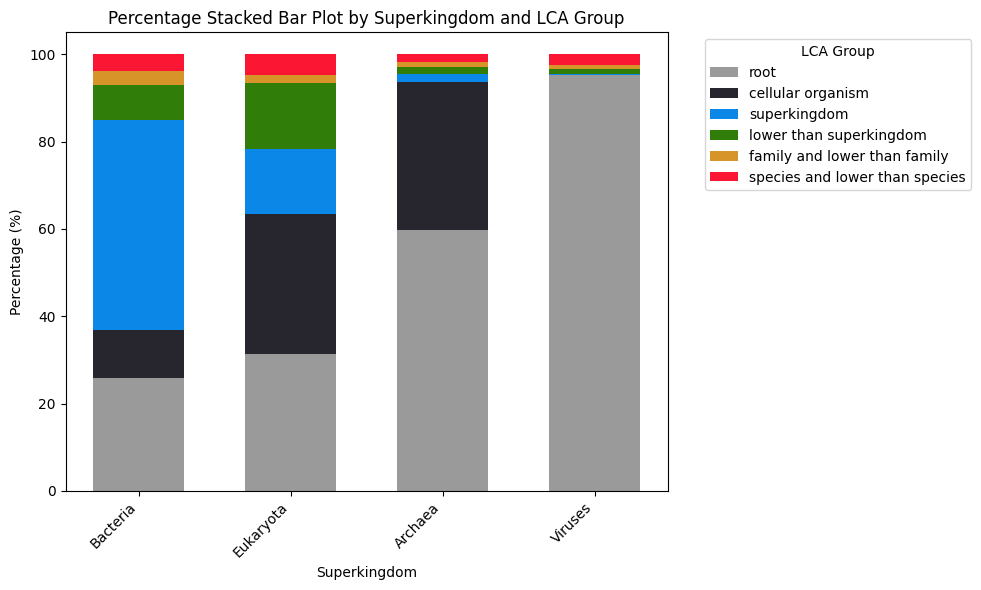

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(
    "../15_n_genus/afesm30_repseq_foldseek_clu_nonsingleton-repId_superkingdom_superkingdomName_lcaId_lcaRank_lcaName_lcaGroupName.tsv",
    sep="\t",
    header=None,
    names="repId superkingdom superkingdomName lcaId lcaRank lcaName lcaGroupName".split()
)

# Desired order and color
desired_column_order = [
    'root', 
    'cellular organism', 
    'superkingdom', 
    'lower than superkingdom', 
    'family and lower than family', 
    'species and lower than species'
]
custom_color = ['#9A9A9A', '#27262F', '#0A87E7', '#307D0A', '#D79429', '#FB1634']

# Group and pivot
grouped = df.groupby(['superkingdomName', 'lcaGroupName']).size().unstack(fill_value=0)
print(grouped)

# Ensure all desired columns are present
for col in desired_column_order:
    if col not in grouped.columns:
        grouped[col] = 0

# Reorder columns
grouped = grouped[desired_column_order]

# Convert to percentages
percent_grouped = grouped.div(grouped.sum(axis=1), axis=0) * 100
percent_grouped = percent_grouped.reindex(['Bacteria', 'Eukaryota', 'Archaea', 'Viruses'])


# Use matplotlib directly to control bar width
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each stack layer manually with reduced bar width
bar_width = 0.6  # narrower bars (default is 0.8)

bottom = [0] * len(percent_grouped)
x = range(len(percent_grouped))
labels = percent_grouped.index

for i, col in enumerate(desired_column_order):
    ax.bar(
        x,
        percent_grouped[col],
        bottom=bottom,
        color=custom_color[i],
        label=col,
        width=bar_width
    )
    bottom = [a + b for a, b in zip(bottom, percent_grouped[col])]

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel("Percentage (%)")
ax.set_xlabel("Superkingdom")
ax.set_title("Percentage Stacked Bar Plot by Superkingdom and LCA Group")
ax.legend(title="LCA Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save and show
plt.savefig("output/percentage_stacked_by_superkingdom_colored_narrowbar.svg")
plt.show()